In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
# Load the data
df = pd.read_excel("C:\\Users\\dell\\OneDrive\\Desktop\\Online Retail.xlsx")

In [3]:

# Check the information and summary statistics of the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [4]:
df.shape

(541909, 8)

In [5]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [6]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
# Preprocessing steps
# Drop rows with missing values
df = df.dropna()

In [8]:
# Convert the InvoiceDate column to datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [9]:
# Add a new column for total sales
df['TotalSales'] = df['Quantity'] * df['UnitPrice']

In [10]:

# Check the updated data
print(df.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  TotalSales  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom       15.30  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom       22.00  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34  


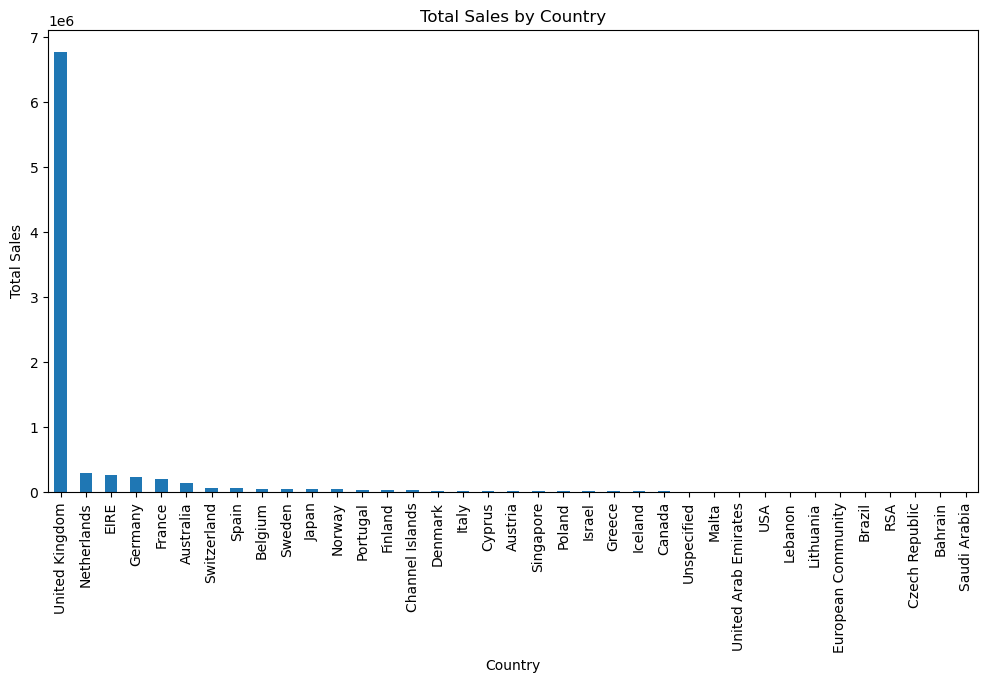

In [11]:
import matplotlib.pyplot as plt

# Calculate total sales by country
total_sales_by_country = df.groupby('Country')['TotalSales'].sum().sort_values(ascending=False)

# Plot the bar chart
plt.figure(figsize=(12, 6))
total_sales_by_country.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.title('Total Sales by Country')
plt.show()


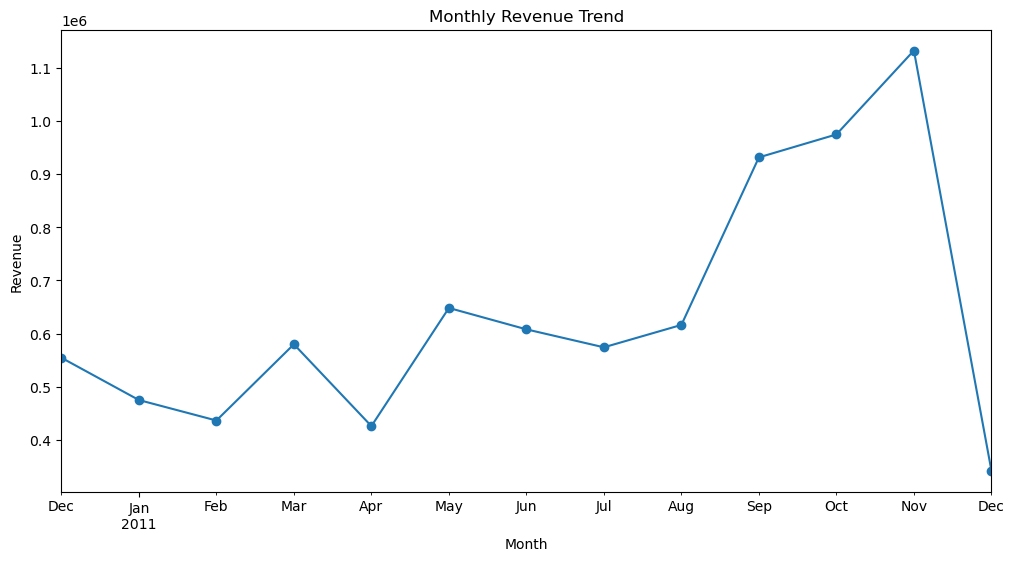

In [12]:
# Convert InvoiceDate to datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Group by month and calculate total revenue
monthly_revenue = df.resample('M', on='InvoiceDate')['TotalSales'].sum()

# Plot the line chart
plt.figure(figsize=(12, 6))
monthly_revenue.plot(kind='line', marker='o')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.title('Monthly Revenue Trend')
plt.show()

In [13]:
# Perform further data transformations, feature engineering, and analysis as per  project requirements
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
#KMeans is an algorithm used for performing K-means clustering, 
#a popular unsupervised machine learning technique for grouping similar data points into clusters based on their feature similarity.

# Select relevant columns for segmentation
selected_columns = ['CustomerID', 'TotalSales']

In [14]:
# Create a subset of the data with the selected columns
subset_df = df[selected_columns]


In [15]:
# Group the data by CustomerID and calculate the sum of TotalSales for each customer
customer_df = subset_df.groupby('CustomerID').sum()

In [16]:
# Perform feature scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_df)

In [17]:
# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

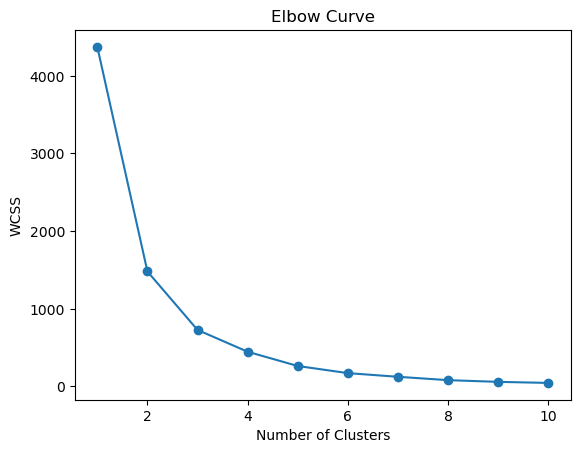

In [18]:


# Plot the elbow curve as a line graph with dots
plt.plot(range(1, 11), wcss, marker='o', linestyle='-')

plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Curve')

plt.show()


In [19]:
# Based on the elbow curve, select the optimal number of clusters
k = 3

In [20]:
# Perform K-means clustering
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(scaled_data)

KMeans(n_clusters=3, random_state=42)

In [21]:
# Add the cluster labels to the customer data
customer_df['Cluster'] = kmeans.labels_
# Perform K-means clustering
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(scaled_data)

# Reset the index of the customer_df DataFrame
customer_df = customer_df.reset_index()

# Add the cluster labels to the customer data
customer_df['Cluster'] = kmeans.labels_

# Analyze the customer segments
segment_analysis = customer_df.groupby('Cluster').mean()

# Display the analysis results
print(segment_analysis)


           CustomerID     TotalSales
Cluster                             
0        15298.503451    1434.198064
1        16732.666667  241136.560000
2        15334.652174   58418.754348


In [22]:
# Analyze the customer segments
segment_analysis = customer_df.groupby('Cluster').mean()

# Display the analysis results
print(segment_analysis)

           CustomerID     TotalSales
Cluster                             
0        15298.503451    1434.198064
1        16732.666667  241136.560000
2        15334.652174   58418.754348


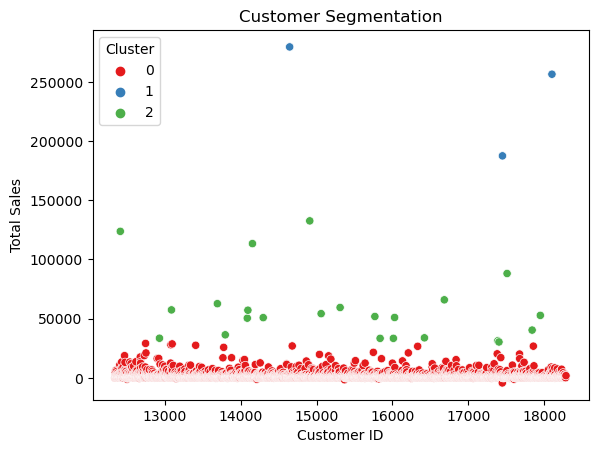

           CustomerID     TotalSales
Cluster                             
0        15298.503451    1434.198064
1        16732.666667  241136.560000
2        15334.652174   58418.754348


In [23]:
import seaborn as sns

# Visualize the clusters
sns.scatterplot(x='CustomerID', y='TotalSales', data=customer_df, hue='Cluster', palette='Set1')
plt.xlabel('Customer ID')
plt.ylabel('Total Sales')
plt.title('Customer Segmentation')
plt.show()

# Analyze the characteristics of each segment
segment_analysis = customer_df.groupby('Cluster').mean()
print(segment_analysis)


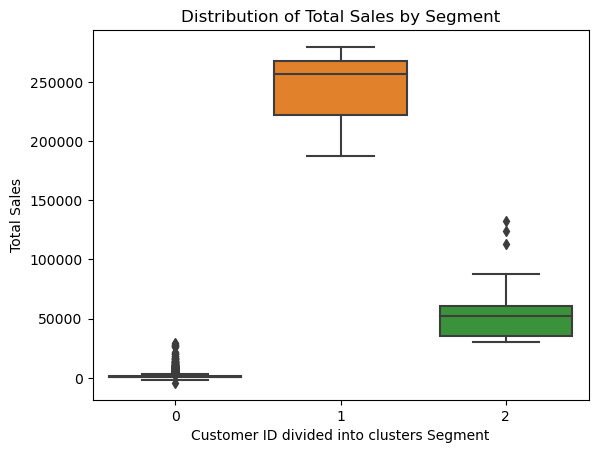

In [24]:
# Create a box plot to visualize the distribution of total sales by segment
sns.boxplot(x='Cluster', y='TotalSales', data=customer_df)
plt.xlabel('Customer ID divided into clusters Segment')
plt.ylabel('Total Sales')
plt.title('Distribution of Total Sales by Segment')
plt.show()


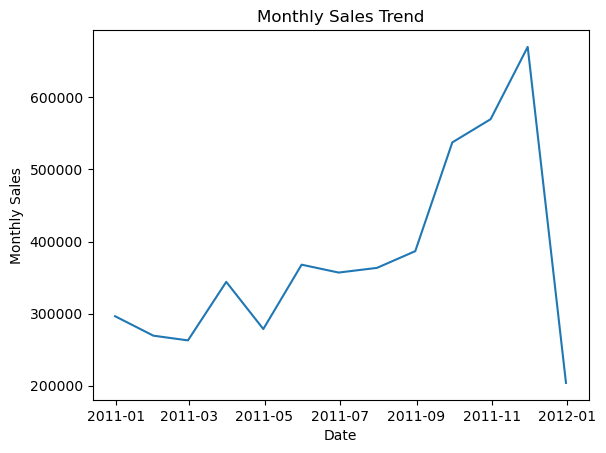

In [26]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
monthly_sales = df.resample('M', on='InvoiceDate')['Quantity'].sum()
plt.plot(monthly_sales)
plt.xlabel('Date')
plt.ylabel('Monthly Sales')
plt.title('Monthly Sales Trend')
plt.show()


In [27]:
# Calculate the average total sales by cluster
avg_sales_by_cluster = customer_df.groupby('Cluster')['TotalSales'].mean()

# Calculate the percentage of customers in each cluster
cluster_percentages = customer_df['Cluster'].value_counts(normalize=True) * 100

# Print the conclusion
print("Conclusion:")
print("Based on the analysis of the 'online retail' dataset, the customers can be segmented into three clusters.")

for cluster in avg_sales_by_cluster.index:
    print(f"\nCluster {cluster}:")
    print(f"- Average Total Sales: ${avg_sales_by_cluster[cluster]:.2f}")
    print(f"- Percentage of Customers: {cluster_percentages[cluster]:.2f}%")

print("\nThe highest average total sales were observed in Cluster 2, indicating a group of high-value customers who contribute significantly to the overall revenue.")
print("On the other hand, Cluster 0 has the lowest average total sales, suggesting potential opportunities for targeted marketing strategies to increase their engagement and sales.")

print("\nThese insights can help the company optimize their marketing and sales efforts, tailor promotions, and provide personalized experiences to different customer segments.")



Conclusion:
Based on the analysis of the 'online retail' dataset, the customers can be segmented into three clusters.

Cluster 0:
- Average Total Sales: $1434.20
- Percentage of Customers: 99.41%

Cluster 1:
- Average Total Sales: $241136.56
- Percentage of Customers: 0.07%

Cluster 2:
- Average Total Sales: $58418.75
- Percentage of Customers: 0.53%

The highest average total sales were observed in Cluster 2, indicating a group of high-value customers who contribute significantly to the overall revenue.
On the other hand, Cluster 0 has the lowest average total sales, suggesting potential opportunities for targeted marketing strategies to increase their engagement and sales.

These insights can help the company optimize their marketing and sales efforts, tailor promotions, and provide personalized experiences to different customer segments.
